### Import Libary

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
from collections import Counter
import math
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

### Settings

In [2]:
# allows more rows columns to be displayed
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### Read in files

In [349]:
path = './DataAnalystAssignment/'
path_results = './WrangledDatasets/'
output_path = './ResultDatasets/'
graph_path = './Graph/'

In [13]:
circuits = pd.read_csv(path + 'circuits.csv', encoding = "ISO-8859-1")
constructor_standings = pd.read_csv(path + 'constructor_standings' + '.csv', encoding = "ISO-8859-1")
constructors = pd.read_csv(path + 'constructors' + '.csv', encoding = "ISO-8859-1")
driver_standings = pd.read_csv(path + 'driver_standings' + '.csv', encoding = "ISO-8859-1")
drivers = pd.read_csv(path + 'drivers' + '.csv', encoding = "ISO-8859-1")
lapTimes = pd.read_csv(path + 'lapTimes' + '.csv', encoding = "ISO-8859-1")
pitStops = pd.read_csv(path + 'pitStops' + '.csv', encoding = "ISO-8859-1")
races = pd.read_csv(path + 'races' + '.csv', encoding = "ISO-8859-1")
results = pd.read_csv(path_results + 'results_wrangled' + '.csv', encoding = "ISO-8859-1")
status = pd.read_csv(path + 'status' + '.csv', encoding = "ISO-8859-1")

### Tasks

#### 1. Carry out an analysis and report on the constructors’ success based on championship season wins.

In [14]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1.0,1.0,1.0,1.0,22.0,1.0,1.0,1,1.0,10.0,58.0,34:50.6,5690616.0,39.0,2.0,1:29.020,218.3,1.0
1,2.0,1.0,2.0,2.0,3.0,5.0,2.0,2,2.0,8.0,58.0,5.478,5696094.0,41.0,3.0,1:28.283,217.586,1.0
2,3.0,1.0,3.0,3.0,7.0,7.0,3.0,3,3.0,6.0,58.0,8.163,5698779.0,41.0,5.0,1:27.706,216.719,1.0
3,4.0,1.0,4.0,4.0,5.0,11.0,4.0,4,4.0,5.0,58.0,17.181,5707797.0,58.0,7.0,1:28.712,215.464,1.0
4,5.0,1.0,6.0,1.0,23.0,3.0,5.0,5,5.0,4.0,58.0,18.014,5708630.0,43.0,1.0,1:29.923,218.385,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777.0,988.0,842.0,5.0,10.0,17.0,16.0,16,16.0,0.0,54.0,NaN,NaN,33.0,16.0,01:43.8,192.542,11.0
23773,23778.0,988.0,828.0,15.0,9.0,19.0,17.0,17,17.0,0.0,54.0,NaN,NaN,36.0,15.0,01:43.6,193.057,11.0
23774,23779.0,988.0,840.0,3.0,18.0,15.0,18.0,18,18.0,0.0,54.0,NaN,NaN,52.0,6.0,01:42.3,195.402,11.0
23775,23780.0,988.0,832.0,4.0,55.0,12.0,NaN,R,19.0,0.0,31.0,NaN,NaN,26.0,14.0,01:43.4,193.41,36.0


In [15]:
# Constructor's win the season championship based on the points they accumulated
# the relevant tables to analysis are: results, races
# need the year information from races so the points can be calcualted per year
results_races = pd.merge(results, races, on='raceId')

,year,constructorId,points
0,1950,6.0,18.0
1,1950,51.0,92.0
2,1950,87.0,0.0
3,1950,105.0,11.0
4,1950,107.0,0.0
...,...,...,...
1089,2017,46.0,2.0
1090,2017,48.0,3.0
1091,2017,49.0,0.0
1092,2017,131.0,668.0


With some research, the constructor's championship 

In [27]:
# sum up the points for each constructor for each year
grouped_results_races = results_races.groupby(['year', 'constructorId'])['points'].apply(sum).reset_index(name='points')
# use the max points of each year
grouped_results_races = grouped_results_races[grouped_results_races.groupby('year')['points'].apply(lambda x: x== x.max())]
grouped_results_races

,year,constructorId,points
1,1950,51.0,92.00
24,1951,6.0,86.00
48,1952,6.0,120.50
73,1953,6.0,122.50
94,1954,6.0,80.28
125,1955,131.0,79.00
132,1956,6.0,83.00
151,1957,105.0,78.00
161,1958,6.0,93.00
202,1959,170.0,97.50


In [46]:
# finally count how many times each constructorId appeared
constructor_win_count = grouped_results_races.groupby('constructorId')['points'].agg(['count']).sort_values( \
                        ['count']).reset_index()
# merge with contructors table to get detailed info about each constructor
constructor_win_count = constructor_win_count.merge(constructors, on='constructorId').sort_values('count')
constructor_win_count.rename(columns={'count':'timesWon'}, inplace=True)
constructor_win_count

,constructorId,timesWon,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,51.0,1,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
3,105.0,1,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati
4,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
5,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
6,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
7,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
8,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
9,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham


According to this, Ferrari has won 24 times...but some quick google indicates that Ferrari only won 16 titles....
<br>
Let's check the results

Check on result for a particualr year, 1951 Alfa won, but data suggests Ferrari actually won. <br>
Same with 2007, McLaren won in points, but McLaren was disqualified for cheating and Ferrari actually got the official title <br>

A bit more research suggests that the constructor championship only stated in 1958, so anything prior was not officially awarded any championship. 
Hence there are 2 version of the result we can produce, one including all years, and one only counting 1958 and above.

In [44]:
constructor_win_count

,constructorId,count,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,51.0,1,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
3,105.0,1,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati
4,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
5,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
6,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
7,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
8,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
9,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham


In [52]:
# let's rename grouped_results_races table
constructor_win_alltime = constructor_win_count

In [72]:
# generate another version for only 1958 and upwards
results_races_1958 = pd.merge(results, races, on='raceId')
results_races_1958 = results_races_1958[results_races_1958['year'] >= 1958]
grouped_results_races_1958 = results_races_1958.groupby(['year', 'constructorId'])['points'].apply(sum).reset_index(name='points')
grouped_results_races_1958 = grouped_results_races_1958[grouped_results_races_1958.groupby('year')['points'].apply(lambda x: x== x.max())]

In [73]:
# finally count how many times each constructorId appeared
constructor_win_1958plus = grouped_results_races_1958.groupby('constructorId')['points'].agg(['count']).sort_values( \
                        ['count']).reset_index()
constructor_win_1958plus = constructor_win_1958plus.merge(constructors, on='constructorId').sort_values('count')
constructor_win_1958plus.rename(columns={'count':'timesWon'}, inplace=True)

In [74]:
constructor_win_1958plus

,constructorId,timesWon,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
3,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
4,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
5,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
6,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
7,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham
8,66.0,3,brm,BRM,British,http://en.wikipedia.org/wiki/BRM
9,9.0,4,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing


timesWon still do not match with the offical results, needs to check the years that ferrari has won

In [64]:
# check the winning years for Ferrari
grouped_results_races_1958['year'][grouped_results_races_1958['constructorId']==6].values

array([1958, 1961, 1970, 1974, 1975, 1976, 1977, 1979, 1982, 1983, 1998,
       2000, 2001, 2002, 2003, 2004, 2005, 2007, 2009], dtype=int64)

In [105]:
# year 2009, the winner was not Ferrari, and Ferrari only finished 4th place with 70 points 
# (https://www.formula1.com/en/results.html/2009/team.html)
# let's dig deeper
check = pd.merge(results, races, on='raceId')
check = check[check['year'] == 2009]
check = check.merge(circuits, on='circuitId')
check[['resultId','raceId','points','name_x', 'date', 'constructorId']][(check['constructorId']==6) & 
                                                                        (check['points']>0)].sort_values('points')

,resultId,raceId,points,name_x,date,constructorId
7,8.0,1.0,1.0,Australian Grand Prix,2009-03-29,6.0
314,315.0,17.0,2.0,Abu Dhabi Grand Prix,2009-11-01,6.0
273,274.0,15.0,3.0,Japanese Grand Prix,2009-10-04,6.0
193,194.0,11.0,3.0,European Grand Prix,2009-08-23,6.0
132,133.0,7.0,4.0,Turkish Grand Prix,2009-06-07,6.0
171,172.0,9.0,5.0,German Grand Prix,2009-07-12,6.0
90,91.0,5.0,6.0,Spanish Grand Prix,2009-05-10,6.0
110,111.0,6.0,6.0,Monaco Grand Prix,2009-05-24,6.0
310,311.0,17.0,6.0,Abu Dhabi Grand Prix,2009-11-01,6.0
190,191.0,10.0,6.0,Hungarian Grand Prix,2009-07-26,6.0


check the last row, raced at British Grand Prix	on 2009-06-21, this says Ferrari won. <br>
But according to quick google search, Ferrari finished at 5th place, recieved 5 points, the 2nd driver finished at 8th place and recieved 1 point.(https://web.archive.org/web/20141124221806/http://www.formula1.com/results/season/2009/813/) <br>
The actual winner of that race was a driver from Red Bull

In [106]:
# sanity check on the result table, produce the same wrong data
results[results['resultId'] == 149.0]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
148,149.0,8.0,17.0,6.0,2.0,2.0,1.0,1,1.0,10.0,70.0,31:50.2,5510245.0,20.0,2.0,1:20.915,206.956,1.0


#### Assumption:
It is not possible to go through each row and check whether the data are accurate. Hence for this task, will have to stick with what is provided by the files.

Let's also include the total no.of seasons each constructor has appeared, to get a success rate 

In [172]:
# use the already merged results and race table from before
# count season appearances
season_appearance = results_races.groupby(['constructorId','year']).min().groupby('constructorId')['resultId'].count(
    ).reset_index(name='appearances')
season_appearance[season_appearance['constructorId'] == 6]

,constructorId,appearances
5,6.0,62


In [180]:
# Ferrari has appeared every season since 1950, so 62 would mean only up to 2012, let's do a sanity check
len(results_races['year'].unique().tolist())

62

Sanity check on the unique count on year matched, seems like certain year's results are missing.

In [193]:
# merge season_appearance with the constructor_win_1958plus and constructor_win_alltime respectively 
constructor_win_1958plus = constructor_win_1958plus.merge(season_appearance, on='constructorId')
constructor_win_alltime = constructor_win_alltime.merge(season_appearance, on='constructorId')

In [197]:
# calculate the win percentage
constructor_win_alltime['winRate'] = constructor_win_alltime['timesWon']/constructor_win_alltime['appearances']
constructor_win_1958plus['winRate'] = constructor_win_1958plus['timesWon']/constructor_win_1958plus['appearances']

In [202]:
# write to file
constructor_win_alltime.to_csv(output_path + 'constructor_win_alltime.csv', index=False)
constructor_win_1958plus.to_csv(output_path + 'constructor_win_1958plus.csv', index=False)

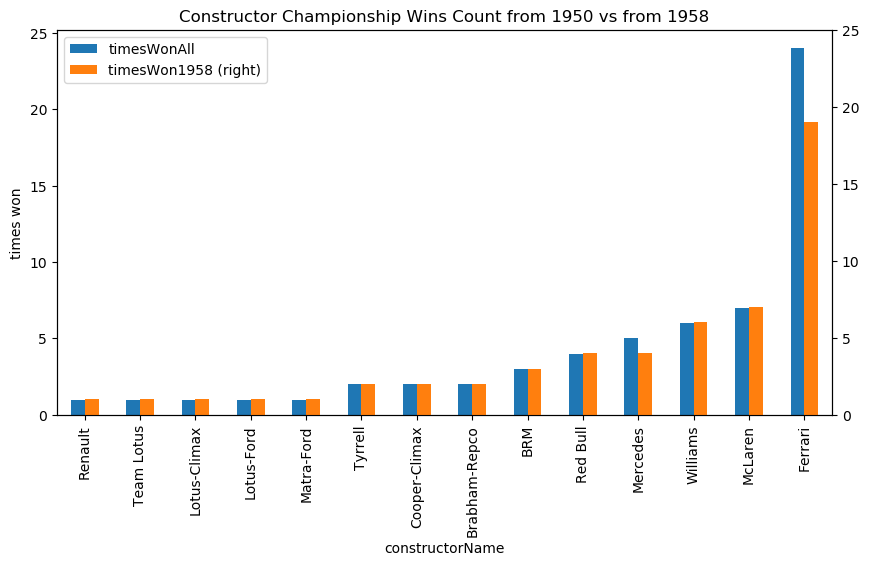

In [351]:
# plot
# merge the 2 columns
constructor_win_merged = constructor_win_alltime.merge(constructor_win_1958plus, on='constructorId')
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['timesWonAll', 'timesWon1958'], secondary_y=['timesWon1958'], 
                                 kind='bar', title='Constructor Championship Wins Count from 1950 vs from 1958', figsize=(10,5))
ax.set_ylabel('times won')
ax.right_ax.set_ylim(0,25)

fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Wins Count from 1950 vs from 1958.png")

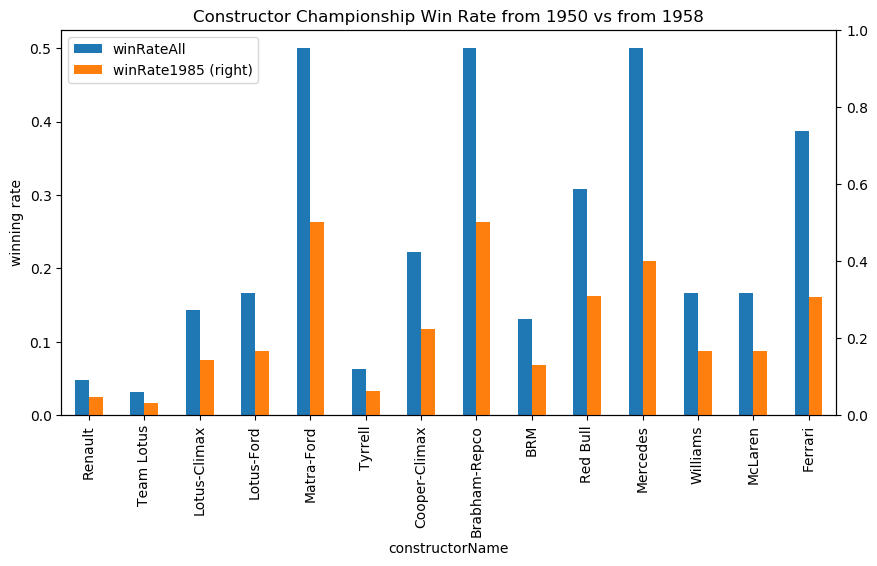

In [350]:
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['winRateAll', 'winRate1985'], secondary_y=['winRate1985'], 
                                 kind='bar', title='Constructor Championship Win Rate from 1950 vs from 1958', figsize=(10,5))
ax.set_ylabel('winning rate')
ax.right_ax.set_ylim(0,1)

fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Win Rate from 1950 vs from 1958.png")

#### 2. Carry out an analysis and report on the drivers’ success based on race wins.